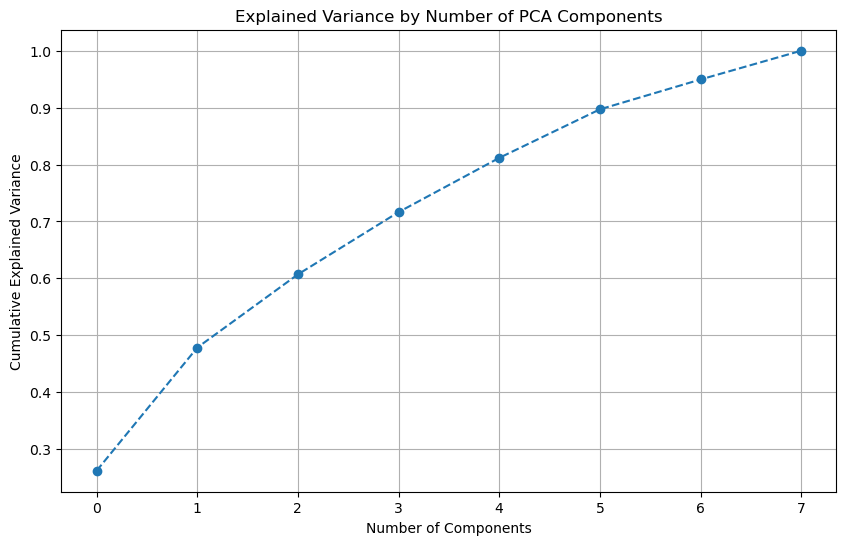

In [7]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

df = pd.read_csv('diabetes.csv')
#print(df.head())
#df.shape 768 Rows, 9 Columns

X, y = df.iloc[:,:-1], df.iloc[:, -1]

# Scale the features
X_scaled = StandardScaler().fit_transform(X)

# Fit PCA on the scaled data
pca = PCA().fit(X_scaled)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of PCA Components')
plt.grid(True)
plt.show()

In [13]:
# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [9]:
K = np.arange(2, 21)
models = [ KMeans(k).fit(X_pca) for k in K ]
inertia_values = [model.inertia_ for model in models]

c:\Users\Nathan Losee\anaconda3\envs\torch\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Nathan Losee\anaconda3\envs\torch\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Nathan Losee\anaconda3\envs\torch\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Nathan Losee\anaconda3\envs\torch\Lib\site-packages\sklearn\cluster\_kmea

Text(0.5, 1.0, 'Using the silhouette score')

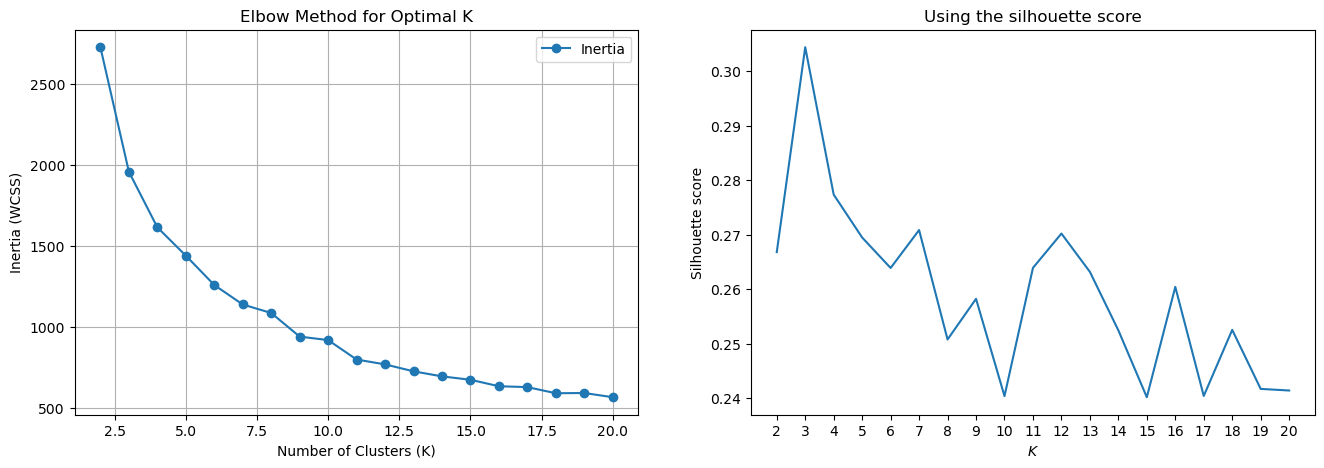

In [10]:
from sklearn.metrics import silhouette_score
fig = plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertia_values, marker='o', label='Inertia')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(K, [silhouette_score(X_pca, m.predict(X_pca)) for m in models])
plt.xlabel('$K$')
plt.xticks(K)
plt.ylabel('Silhouette score')
# plt.grid()
plt.title("Using the silhouette score")

In [14]:
# New K-Means

# Apply K-means clustering
kmeans = KMeans(init='k-means++', n_clusters=12, n_init=5).fit(X_pca)
silhouette_score(X_pca, kmeans.labels_)

c:\Users\Nathan Losee\anaconda3\envs\torch\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.3554164656366467

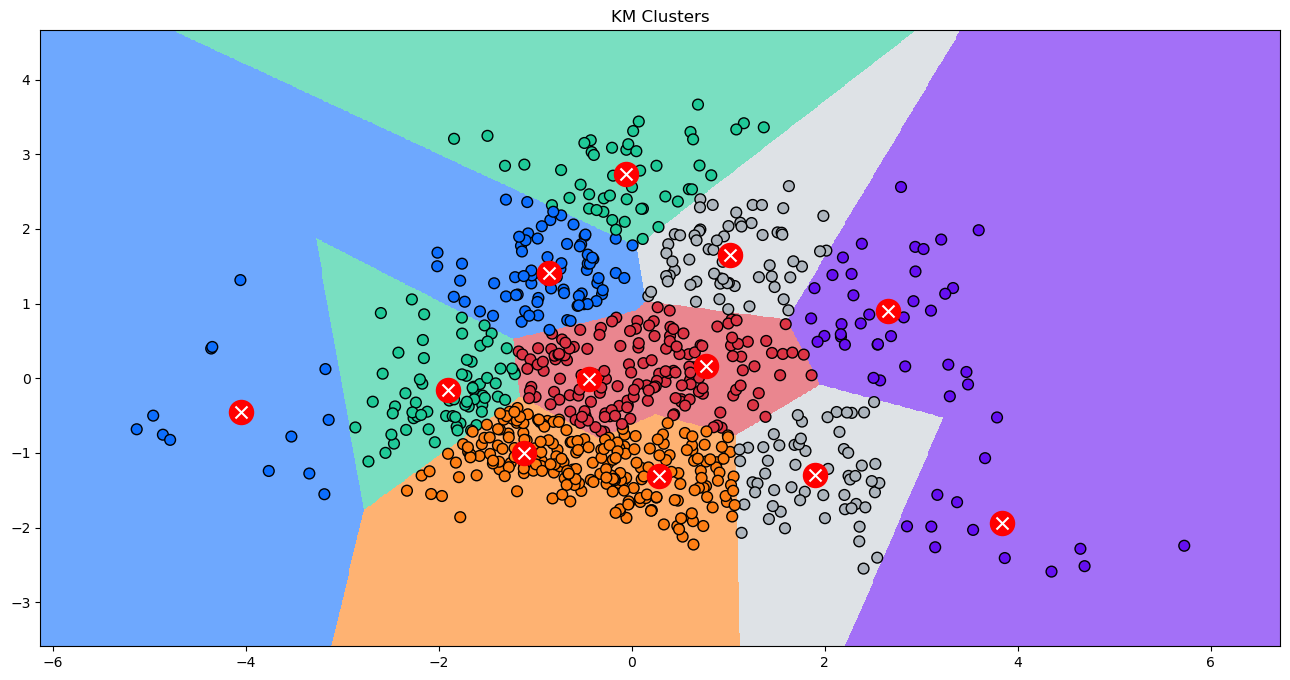

In [15]:
import mylib as my

my.plot_decision_regions(X_pca, kmeans.predict(X_pca).reshape(len(X_pca), 1), kmeans, resolution=0.01, title="KM Clusters")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', s=300, facecolors='red', edgecolors='r', color='r')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c="w", marker="x", s=75)

In [18]:
#Guassian Mixture Model

from sklearn.mixture import GaussianMixture
models = [ GaussianMixture(k).fit(X_pca) for k in K ]

c:\Users\Nathan Losee\anaconda3\envs\torch\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Nathan Losee\anaconda3\envs\torch\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Nathan Losee\anaconda3\envs\torch\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Nathan Losee\anaconda3\envs\torch\Lib\site-packages\sklearn\cluster\_kmea

Text(0.5, 1.0, 'Using the silhouette score')

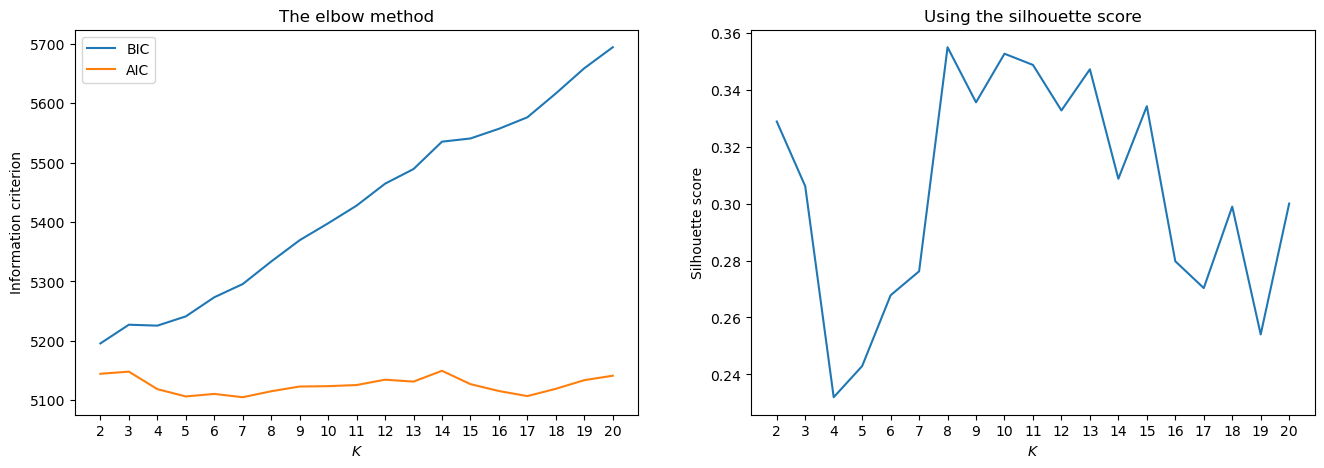

In [19]:
fig = plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(K, [m.bic(X_pca) for m in models], label='BIC')
plt.plot(K, [m.aic(X_pca) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('$K$')
plt.xticks(K)
plt.ylabel('Information criterion')
# plt.grid()
plt.title("The elbow method")

plt.subplot(1, 2, 2)
plt.plot(K, [silhouette_score(X_pca, m.predict(X_pca)) for m in models])
plt.xlabel('$K$')
plt.xticks(K)
plt.ylabel('Silhouette score')
# plt.grid()
plt.title("Using the silhouette score")

c:\Users\Nathan Losee\anaconda3\envs\torch\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


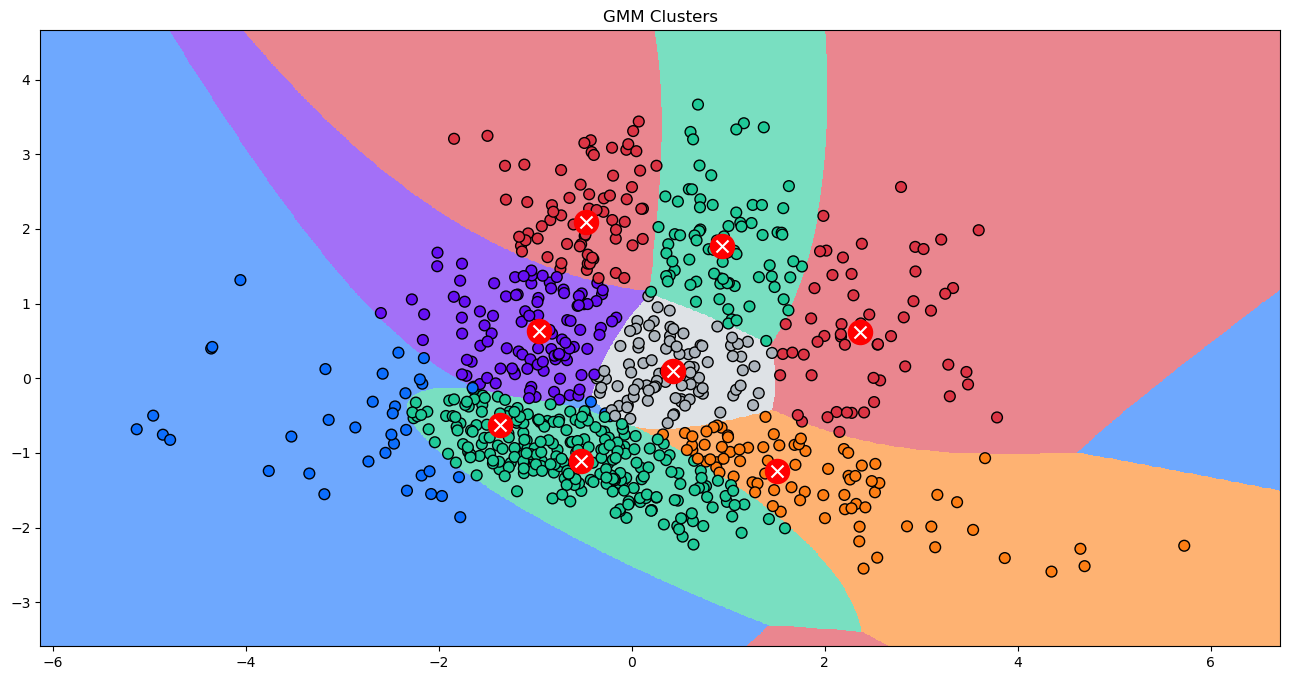

In [21]:
gmm = GaussianMixture(n_components=8).fit(X_pca)

my.plot_decision_regions(X_pca, gmm.predict(X_pca).reshape(len(X_pca), 1), gmm, resolution=0.01, title="GMM Clusters")
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], marker='o', s=300, facecolors='red', edgecolors='r', color='r')
plt.scatter(gmm.means_[:,0], gmm.means_[:,1], c="w", marker="x", s=75)
